In [1]:
#IMPORTS INICIALES
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autoencoderManager import AutoencoderManager
from fonts import getCharacterMatrix,getCharacterMap,getFormattedFont
from helpers.configHelper import ConfigHelper
from graph import plotErrorsAgainstSteps
from noise import addNoise
import pickle
from os.path import exists

# TP5 - Deep Learning

In [2]:
#LEEMOS LOS PARAMETROS DEL CONFIG HELPER

configPath="./config/config.json"
configHelper = ConfigHelper(configPath)
(architecture,encoderActivationFunction,latentSpaceActivationFunction,decoderActivationFunction,encoderBeta,latentSpaceBeta,decoderBeta,learningRate,maxEpochs,maxToleranceExponent,randomSeed,font,noiseProbability) = configHelper.getProperties()

## Ejercicio 1
### a) Autoencoder basico

In [3]:
#PEDIR LA FONT A UTILIZAR Y ARMAR EL TRAINING SET Y RESULT SET
(trainingSet,fontCharacters) = getFormattedFont(font,flatten=True)
resultsSet = trainingSet

In [4]:
# ENTRENAMIENTO DE LA RED
import multiprocessing
def trainAutoencoder(architecture,name,autoencoderManagers):
    PATH = f"autoencoderW{name}.pickle"
    autoencoderManager = AutoencoderManager(architecture,encoderActivationFunction,latentSpaceActivationFunction,decoderActivationFunction,learningRate,maxEpochs)
    if exists(PATH):
        print("INITIALIZING WEIGHTS FOR CONFIGURATION")
        file = open(PATH,'rb')
        (wFinal,finalError,errors) = pickle.load(file)
        file.close()
        autoencoderManager.initilizeWeights(trainingSet,wFinal,errors)
    else:
        print("CREATING WEIGHTS FOR CONFIGURATION")
        (wFinal,finalError) = autoencoderManager.start(trainingSet)
        file = open(PATH,'wb')
        pickle.dump((wFinal,finalError,autoencoderManager.errors),file)
        file.close()
        autoencoderManager.saveNetwork(f"{PATH}.json",errors=autoencoderManager.errors)

    #print(wFinal)
    autoencoderManagers[name] = autoencoderManager
    
architectures = [[35,5, 2,5, 35],[35,6, 2,6, 35],[35,7, 2,7, 35]]
architectureNames = ["35_5","35_6","35_7"]
manager = multiprocessing.Manager()
managers = manager.dict()
processes = [multiprocessing.Process(target=trainAutoencoder,args=(arch[0],arch[1],managers)) for arch in zip(architectures,architectureNames)]
[p.start() for p in processes]
[p.join() for p in processes]
autoencoderManagers = managers.values()
autoencoderManagersArchitectures = managers.keys()
print(managers.keys())
print(autoencoderManagers)
    


INITIALIZING WEIGHTS FOR CONFIGURATION
INITIALIZING WEIGHTS FOR CONFIGURATIONtraining matrix (35, 32)

training matrix (35, 32)
INITIALIZING WEIGHTS FOR CONFIGURATION
training matrix (35, 32)
['35_5', '35_6', '35_7']
[<autoencoderManager.AutoencoderManager object at 0x7fb8c8e5e910>, <autoencoderManager.AutoencoderManager object at 0x7fb90bfc9ac0>, <autoencoderManager.AutoencoderManager object at 0x7fb90bfcedc0>]


{'X': [0.0, 3.1650221561449596, 0.0, 0.0, 2.328625511930086, 0.0, 0.0, 0.0, 3.2201083513387667, 76.53205444993725, -0.4166393658292643, 0.014455301032449297, 0.0, 9.862067260612895, 0.7311251907393765, 0.0, 0.0, 0.0, 0.0, 0.0, 59.613441150356294, 0.5434002573180182, 1.2274491606921638, 0.9500462983668582, 1.9119861461008218, -0.43405271619991126, 0.0, 3.2060655967340703, 0.6723161181994587, -0.8332787316585286, 8.027374702365444, 1.8437941549487187], 'Y': [0.0, 10.169807519650437, 0.0, 0.0, -2.1950708720126078, 0.0, 0.0, 0.0, 4.007446095188401, 60.60670679890445, -3.182141577402962, -4.90613115054832, 0.0, 16.687696124707138, 2.0118180217822084, 0.0, 0.0, 0.0, 0.0, 0.0, 41.52575917485558, 1.914439119710655, 1.1986483990405696, 3.347083065633112, -5.37721244941557, -22.857285683826927, 0.0, 0.5922849716483396, -5.397628248915717, -6.364283154805924, 9.455470330797207, 3.6539714887932035], 'Label': ['@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',

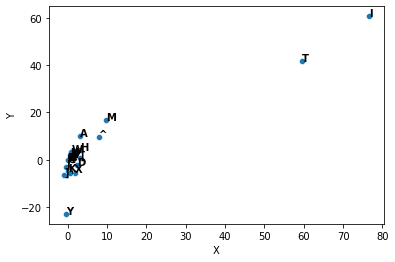

In [5]:
# LATENT SPACE CONFIGURATION
latentSpaceData = {
    'X' : [],
    'Y' : [],
    'Label':[]
}
i=0
for character in trainingSet:
    point = autoencoderManagers[0].getLatentSpaceConfig(character)
    latentSpaceData['X'].append(point[0])
    latentSpaceData['Y'].append(point[1])
    latentSpaceData['Label'].append(fontCharacters[i])
    i+=1
data = pd.DataFrame(latentSpaceData)
print(latentSpaceData)
sp = sns.scatterplot(x="X",y="Y",data=data)
for c in range(0,data.shape[0]):
    sp.text(data.iloc[c]['X'],data.iloc[c]['Y'],data.iloc[c]['Label'],fontsize=10,horizontalalignment='left',weight='bold')

In [6]:
#autoencoderManager.saveNetwork('30-10-2.json', autoencoderManager.errors)

NameError: name 'autoencoderManager' is not defined

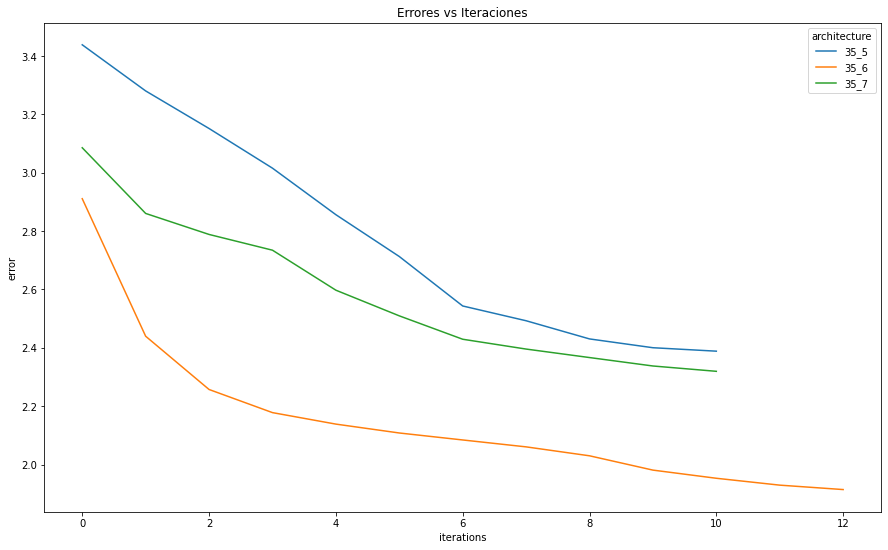

In [8]:
#GRAFICAR ERRORS VS STEPS
plotErrorsAgainstSteps(autoencoderManagers,autoencoderManagersArchitectures)


In [ ]:
(autoencoderManager,errors) = AutoencoderManager.networkFromFile('35-20-3_errors.json' )

In [ ]:
# PLOT INPUT VS OUTPUT OF FINAL LAYER
(formattedFont,fontCharacters) = getFormattedFont(font,flatten=False)
print(formattedFont)
figure, axes = plt.subplots( 2,len(formattedFont), sharex=True, figsize=(19,7))
for font in range(0,len(formattedFont)):
    getCharacterMap(formattedFont[font],ax=axes[0,font])
    umbralFormattedCharacter = [x if x>=0.35 else 0 for x in autoencoderManager.propagate(trainingSet[font])]
    getCharacterMap(getCharacterMatrix(np.array(umbralFormattedCharacter)),ax=axes[1,font])

In [ ]:
n = 15  # figure with 15x15 digits
width_digit_size = 5
height_digit_size = 7
figure = np.zeros((height_digit_size * n, width_digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = np.linspace(0, 1, n)
grid_y = np.linspace(0, 1, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = autoencoderManager.decodeFromLatentSpace(z_sample)
        digit = x_decoded.reshape(height_digit_size, width_digit_size)
        getCharacterMap(digit)
        figure[i * height_digit_size: (i + 1) * height_digit_size,
               j * width_digit_size: (j + 1) * width_digit_size] = digit

plt.figure(figsize=(30, 30))
plt.imshow(figure, cmap='Greys_r')
plt.show()

### b) Denoising autoencoder

In [ ]:
#ARMAMOS TRAINING SET CON RUIDO Y EL NUEVO RESULTS SET

#Seteo de seed
np.random.seed(randomSeed)
random.seed(randomSeed)

numberOfElements = 5
#Agarramos las 10 primeras letras de la font
flattenedSubFont = getFormattedFont(font,flatten=True)[:numberOfElements]
# noiseProbability = 0.1
numberOfSubFonts = 5
#Armamos el trainingSet colocando las letras con distinto ruido segun la probabilidad especificada, y el resultsSet con las letras sin ruido
newTrainingSet = []
newResultsSet = []
# for i in range(0,numberOfSubFonts):
#     for j in range(0,len(flattenedSubFont)):
#         newTrainingSet.append(addNoise(flattenedSubFont[j],noiseProbability))
#         newResultsSet.append(flattenedSubFont[j])
for j in range(0,len(flattenedSubFont)):
    for i in range(0,numberOfSubFonts):
        newTrainingSet.append(addNoise(flattenedSubFont[j],noiseProbability))
        newResultsSet.append(flattenedSubFont[j])


newTrainingSet = np.asarray(newTrainingSet)
newResultsSet = np.asarray(newResultsSet)


In [ ]:
# IMPRIMIMOS EL TRAINING SET Y EL RESULTS SET
figure, axes = plt.subplots( 2,len(newTrainingSet), sharex=True, figsize=(19,7))
for i in range(0,len(newTrainingSet)):
    # print(newTrainingSet[i])
    umbralTrainingFormattedCharacter = [x if x>=0.35 else 0 for x in newTrainingSet[i]]
    getCharacterMap(getCharacterMatrix(np.array(umbralTrainingFormattedCharacter)),ax=axes[0,i])
    umbralResultFormattedCharacter = [x if x>=0.35 else 0 for x in newResultsSet[i]]
    getCharacterMap(getCharacterMatrix(np.array(umbralResultFormattedCharacter)),ax=axes[1,i])

    # getCharacterMap(formattedFont[font],ax=axes[0,font])
    # umbralFormattedCharacter = [x if x>=0.35 else 0 for x in autoencoderManager.propagate(trainingSet[font])]
    # getCharacterMap(getCharacterMatrix(np.array(umbralFormattedCharacter)),ax=axes[1,font])

In [ ]:
#ENTRENAMIENTO DE LA RED

denoisingAutoencoderManager = AutoencoderManager(architecture,encoderActivationFunction,latentSpaceActivationFunction,decoderActivationFunction,learningRate,maxEpochs)
(wFinal,finalError) = denoisingAutoencoderManager.start(newTrainingSet,newResultsSet)

In [ ]:
#TESTEO DE LA RED
#Generamos un nuevo set de letras con ruido
noiseSet = []
resultsSet = flattenedSubFont
for j in range(0,len(flattenedSubFont)):
        noiseSet.append(addNoise(flattenedSubFont[j],noiseProbability))
noiseSet = np.asarray(noiseSet)
#Comparamos el input ruidoso con la salida de la red
figure, axes = plt.subplots( 2,len(noiseSet), sharex=True, figsize=(19,7))
for i in range(0,len(noiseSet)):
    umbralTrainingFormattedCharacter = [x if x>=0.35 else 0 for x in noiseSet[i]]
    getCharacterMap(getCharacterMatrix(np.array(umbralTrainingFormattedCharacter)),ax=axes[0,i])
#     umbralResultFormattedCharacter = [x if x>=0.35 else 0 for x in newResultsSet[i]]
#     getCharacterMap(getCharacterMatrix(np.array(umbralResultFormattedCharacter)),ax=axes[1,i])
#     getCharacterMap(formattedFont[font],ax=axes[0,font])
    umbralResultFormattedCharacter = [x if x>=0.35 else 0 for x in denoisingAutoencoderManager.propagate(noiseSet[i])]
    getCharacterMap(getCharacterMatrix(np.array(umbralResultFormattedCharacter)),ax=axes[1,i])